<a href="https://colab.research.google.com/github/spencerduberry/BankChurn_ML_Python/blob/main/Clustering/Cluster_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10th Percentile: 0.0
20th Percentile: 0.0
30th Percentile: 0.0
40th Percentile: 0.0
50th Percentile: 61933.2
60th Percentile: 96420.39
70th Percentile: 113573.75999999997
80th Percentile: 128950.94400000002
90th Percentile: 147231.614


<ipython-input-2-70299e273926>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Churn Rate', data=churn_rates, palette='Set2')


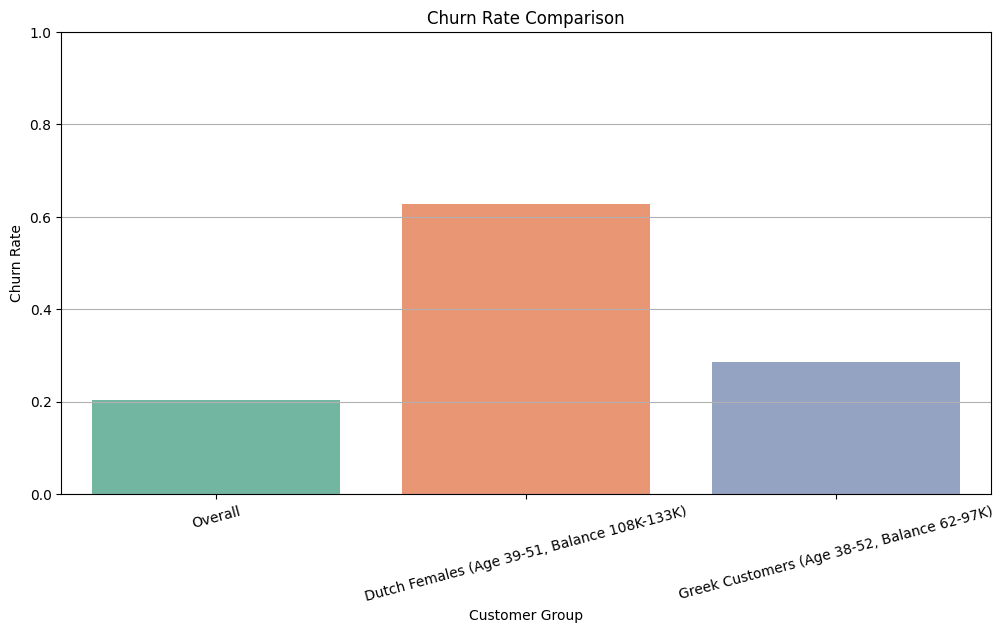

<ipython-input-2-70299e273926>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df_selected, palette='Set2')


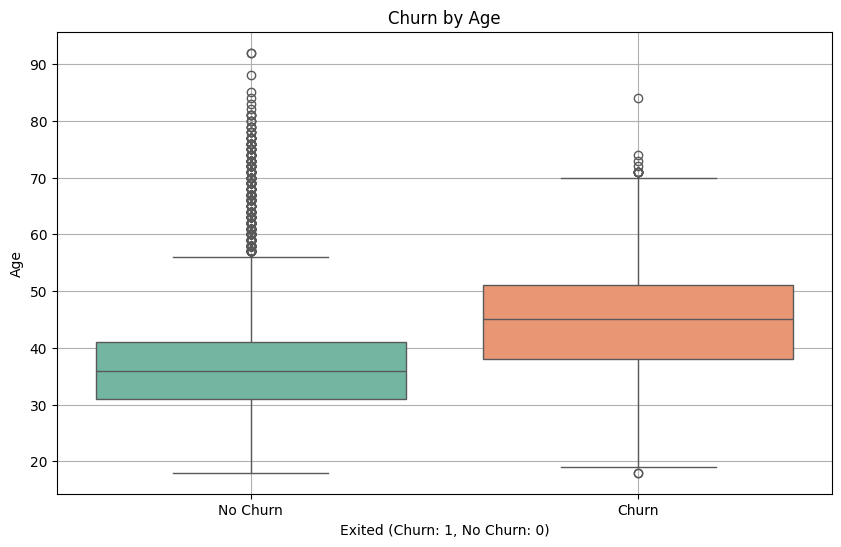

<ipython-input-2-70299e273926>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nationality', y='Churn Rate', data=nationality_churn_rate, palette='viridis')


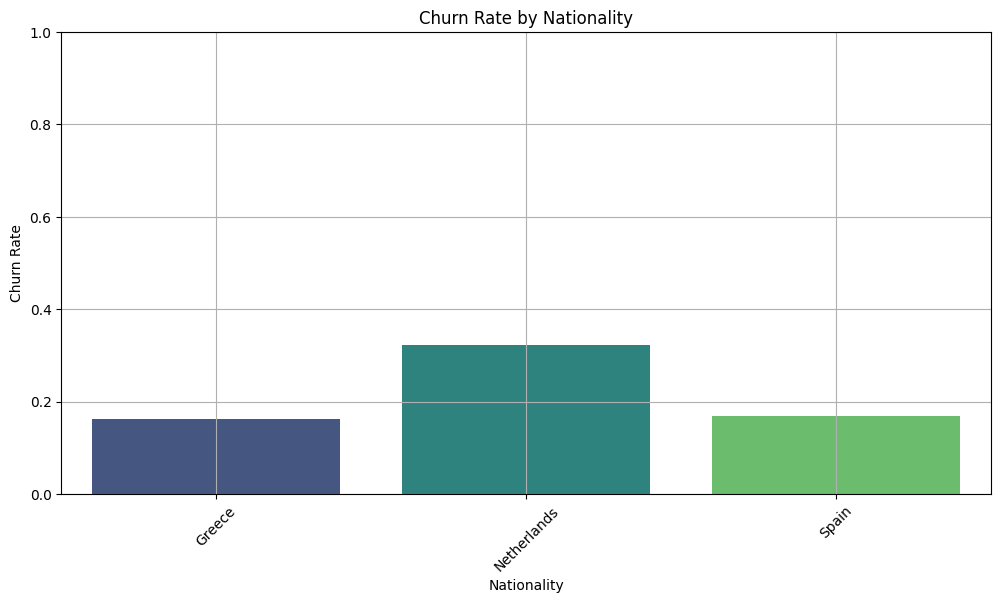

<ipython-input-2-70299e273926>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df_selected, palette='Set2')


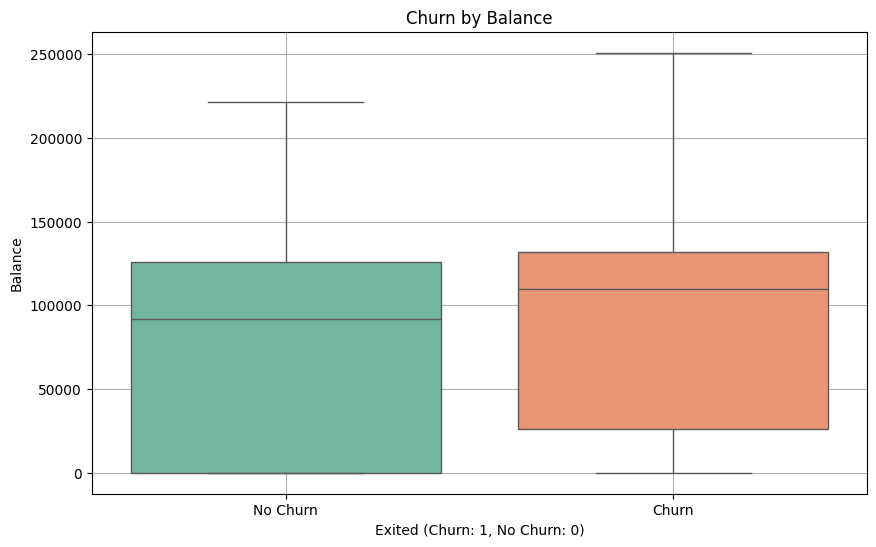

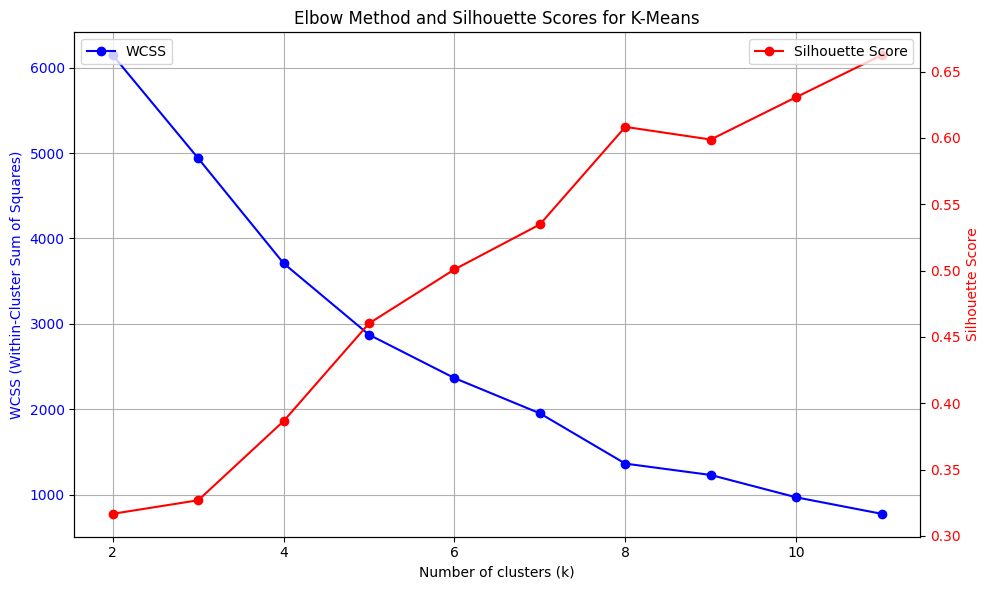

<ipython-input-2-70299e273926>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['KMeans_Cluster'] = kmeans_clusters
<ipython-input-2-70299e273926>:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DBSCAN_Cluster'] = dbscan_clusters
<ipython-input-2-70299e273926>:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

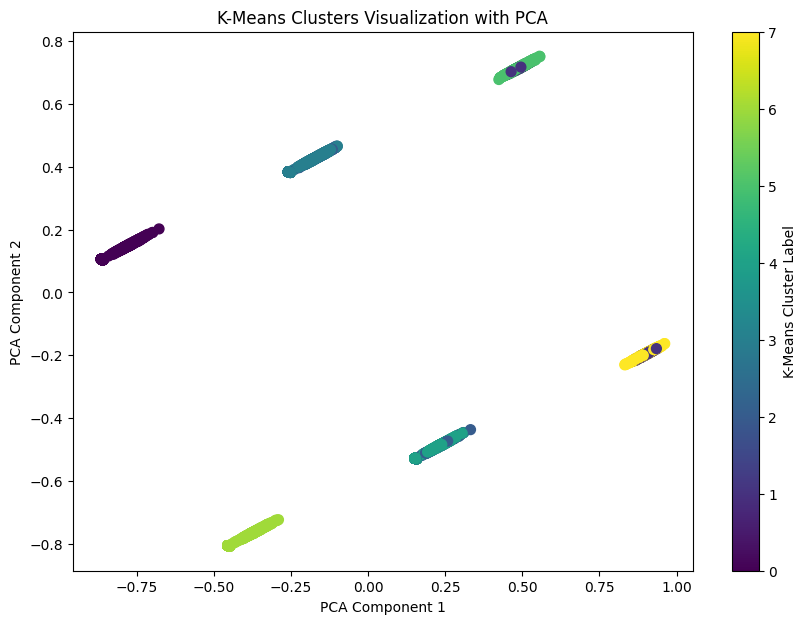

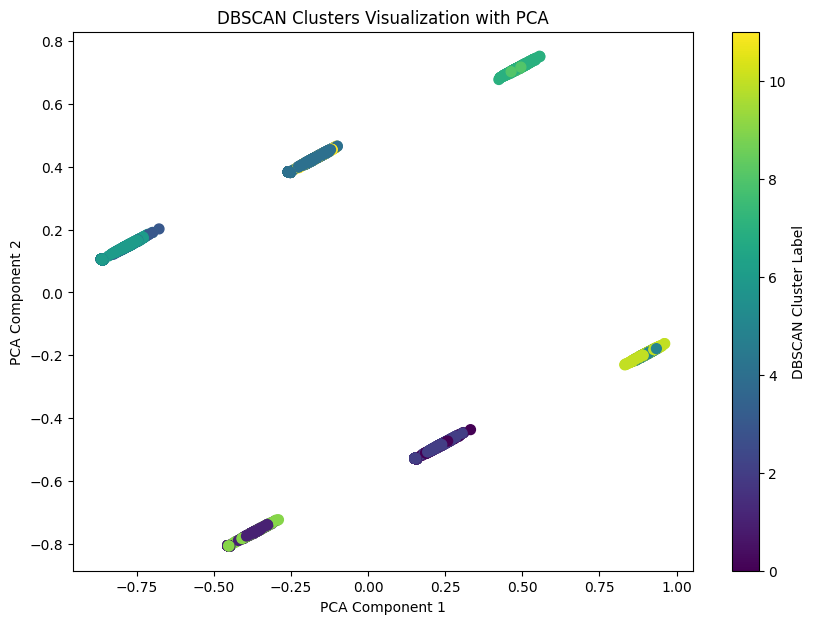

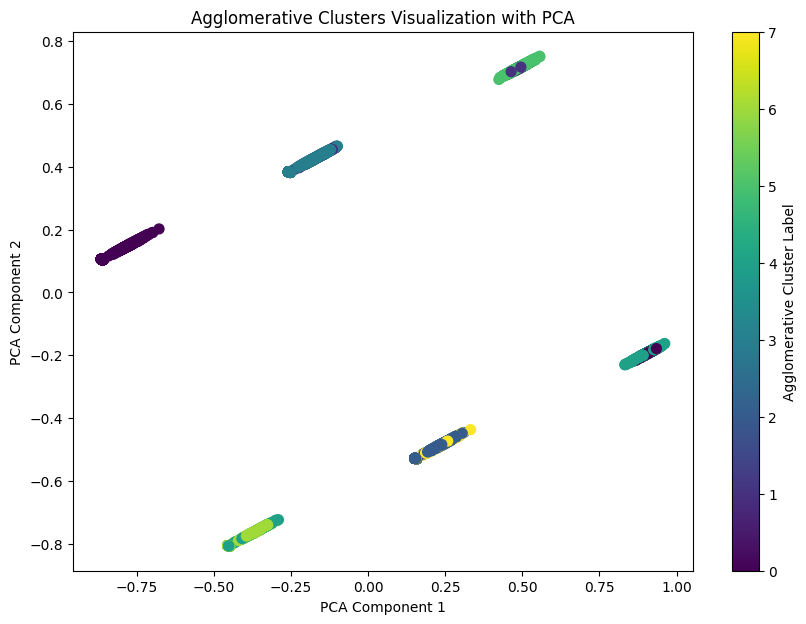

Number of Rows in Each K-Means Cluster:
   Cluster  Number of Rows
0        3            2297
1        4            1719
2        0            1327
3        6            1054
4        5             902
5        2             786
6        1             781
7        7             713
Number of Rows in Each DBSCAN Cluster:
    Cluster  Number of Rows
0         4            2297
1         2            1719
2         6            1151
3         7             902
4         1             825
5        10             713
6         0             445
7         5             430
8         8             351
9        11             341
10        9             229
11        3             176
Number of Rows in Each Agglomerative Cluster:
   Cluster  Number of Rows
0        3            2297
1        0            1757
2        2            1719
3        4             942
4        5             902
5        6             825
6        1             692
7        7             445
Exit Rates by K-Means Clu

In [ ]:
# clustering v2

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
import joblib  # For saving the scaler
import os

# Get the directory of the current script
current_dir = os.path.dirname(os.path.abspath("Summative Data.csv"))

# Construct the path to the CSV file (one level up)
file_path = os.path.join(current_dir, "..", "Summative Data.csv")

# Read the CSV file
df = pd.read_csv(file_path)

# Filter for Greek customers
greek_customers = df[
    df["Geography"] == "Greece"
]  # Adjust to the exact string in your dataset

# Check if there are Greek customers in the filtered data
if not greek_customers.empty:
    # Calculate the 10th, 20th, ..., 90th percentiles
    percentiles = np.percentile(
        greek_customers["Balance"], [10, 20, 30, 40, 50, 60, 70, 80, 90]
    )

    # Print the balance values at the specified percentiles
    for p, val in zip(range(10, 100, 10), percentiles):
        print(f"{p}th Percentile: {val}")
else:
    print("No Greek customers found in the dataset.")

# Calculate the overall churn rate
overall_churn_rate = df["Exited"].mean()

# Filter for Dutch customers with the specified criteria
dutch_customers = df[
    (df["Geography"] == "Netherlands")
    & (df["Age"] >= 39)
    & (df["Age"] <= 51)
    & (df["Gender"] == "Female")
    & (df["Balance"] >= 108000)
    & (df["Balance"] <= 133000)
]

# Calculate churn rate for the Dutch demographic
dutch_churn_rate = dutch_customers["Exited"].mean()

# Filter for Greek customers with the specified criteria (50th-60th percentile)
greek_customers = df[
    (df["Geography"] == "Greece")
    & (df["Age"] >= 38)
    & (df["Age"] <= 52)
    & (df["Balance"] > 62000)
    & (df["Balance"] <= 97000)
]

# Calculate churn rate for the Greek demographic
greek_churn_rate = greek_customers["Exited"].mean()

# Prepare data for plotting
churn_rates = pd.DataFrame(
    {
        "Group": [
            "Overall",
            "Dutch Females (Age 39-51, Balance 108K-133K)",
            "Greek Customers (Age 38-52, Balance 62-97K)",
        ],
        "Churn Rate": [overall_churn_rate, dutch_churn_rate, greek_churn_rate],
    }
)

# Create a bar plot for churn rates
plt.figure(figsize=(12, 6))  # Increase the figure size to accommodate more data
sns.barplot(x="Group", y="Churn Rate", data=churn_rates, palette="Set2")
plt.title("Churn Rate Comparison")
plt.xlabel("Customer Group")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)  # Churn rate is between 0 and 1
plt.grid(axis="y")
plt.xticks(rotation=15)  # Rotate x-ticks for better readability
plt.show()

# Select only the key features: Age, Balance, Geography, and Gender
df_selected = df[
    ["Age", "Balance", "Geography", "Gender", "Exited"]
]  # Include Exited for analysis

# Plot Churn by Age using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exited", y="Age", data=df_selected, palette="Set2")
plt.title("Churn by Age")
plt.xlabel("Exited (Churn: 1, No Churn: 0)")
plt.ylabel("Age")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.grid()
plt.show()

# Calculate churn rates by nationality
nationality_churn_rate = df_selected.groupby("Geography")["Exited"].mean().reset_index()
nationality_churn_rate.columns = ["Nationality", "Churn Rate"]

# Plot Churn by Nationality using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Nationality", y="Churn Rate", data=nationality_churn_rate, palette="viridis"
)
plt.title("Churn Rate by Nationality")
plt.xlabel("Nationality")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)  # Churn rate is between 0 and 1
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot Churn by Balance using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exited", y="Balance", data=df_selected, palette="Set2")
plt.title("Churn by Balance")
plt.xlabel("Exited (Churn: 1, No Churn: 0)")
plt.ylabel("Balance")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.grid()
plt.show()

# One-hot encode the categorical variables (Geography and Gender)
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Normalize the continuous variables (Age and Balance)
normalize_columns = ["Age", "Balance"]
scaler = MinMaxScaler()
df_encoded[normalize_columns] = scaler.fit_transform(df_encoded[normalize_columns])

# Save the scaler for later use
joblib.dump(scaler, "scaler.pkl")  # Saving the scaler object

# Remove outliers (rows containing numeric variables with Z-Scores > 3)
numeric_cols = df_encoded.select_dtypes(include=[np.number])
df_filtered = df_encoded[(np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)]

# K-Means Clustering
# List to hold WCSS and silhouette scores
wcss = []
silhouette_scores = []

# Range of cluster values for K-Means
k_values = range(2, 12)  # Start from 2 since silhouette score is not defined for k=1

# Loop over the k values for K-Means
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_filtered)  # Using df_filtered for clustering
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the current k
    silhouette_avg = silhouette_score(
        df_filtered, cluster_labels
    )  # Calculate silhouette score
    silhouette_scores.append(silhouette_avg)  # Store the silhouette score

# Plotting the results for K-Means
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot WCSS
ax1.plot(k_values, wcss, marker="o", color="b", label="WCSS")
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("WCSS (Within-Cluster Sum of Squares)", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.grid()

# Create a second y-axis for the silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker="o", color="r", label="Silhouette Score")
ax2.set_ylabel("Silhouette Score", color="r")
ax2.tick_params(axis="y", labelcolor="r")

# Add titles and legends
plt.title("Elbow Method and Silhouette Scores for K-Means")
fig.tight_layout()  # To prevent overlap
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

# Apply K-Means clustering with a chosen number of clusters
optimal_k = 8  # Example: select 8 based on your analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_filtered)

# Add the K-Means cluster labels back to the filtered DataFrame
df_filtered["KMeans_Cluster"] = kmeans_clusters

# DBSCAN Clustering
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_filtered)

# Add the DBSCAN cluster labels back to the filtered DataFrame
df_filtered["DBSCAN_Cluster"] = dbscan_clusters

# Agglomerative Clustering
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=8)  # Adjust the number of clusters as needed
agglo_clusters = agglo.fit_predict(df_filtered)

# Add the Agglomerative cluster labels back to the filtered DataFrame
df_filtered["Agglo_Cluster"] = agglo_clusters

# Apply PCA to reduce the dataset to 2 components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(
    df_filtered.drop(
        columns=["Exited", "KMeans_Cluster", "DBSCAN_Cluster", "Agglo_Cluster"]
    )
)  # Drop 'Exited' and 'Cluster' columns before PCA

# Create a scatter plot for K-Means
plt.figure(figsize=(10, 7))
plt.scatter(
    df_pca[:, 0], df_pca[:, 1], c=df_filtered["KMeans_Cluster"], cmap="viridis", s=50
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters Visualization with PCA")
plt.colorbar(label="K-Means Cluster Label")
plt.show()

# Create a scatter plot for DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(
    df_pca[:, 0], df_pca[:, 1], c=df_filtered["DBSCAN_Cluster"], cmap="viridis", s=50
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clusters Visualization with PCA")
plt.colorbar(label="DBSCAN Cluster Label")
plt.show()

# Create a scatter plot for Agglomerative Clustering
plt.figure(figsize=(10, 7))
plt.scatter(
    df_pca[:, 0], df_pca[:, 1], c=df_filtered["Agglo_Cluster"], cmap="viridis", s=50
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clusters Visualization with PCA")
plt.colorbar(label="Agglomerative Cluster Label")
plt.show()

# Display the number of rows (instances) in each cluster for K-Means
cluster_counts_kmeans = df_filtered["KMeans_Cluster"].value_counts().reset_index()
cluster_counts_kmeans.columns = ["Cluster", "Number of Rows"]
print("Number of Rows in Each K-Means Cluster:")
print(cluster_counts_kmeans)

# Display the number of rows (instances) in each cluster for DBSCAN
cluster_counts_dbscan = df_filtered["DBSCAN_Cluster"].value_counts().reset_index()
cluster_counts_dbscan.columns = ["Cluster", "Number of Rows"]
print("Number of Rows in Each DBSCAN Cluster:")
print(cluster_counts_dbscan)

# Display the number of rows (instances) in each cluster for Agglomerative Clustering
cluster_counts_agglo = df_filtered["Agglo_Cluster"].value_counts().reset_index()
cluster_counts_agglo.columns = ["Cluster", "Number of Rows"]
print("Number of Rows in Each Agglomerative Cluster:")
print(cluster_counts_agglo)

# Analyze exit variable within each K-Means cluster
exit_rates_kmeans = df_filtered.groupby("KMeans_Cluster")["Exited"].mean().reset_index()
exit_rates_kmeans.columns = ["Cluster", "Exit Rate"]
print("Exit Rates by K-Means Cluster:")
print(exit_rates_kmeans)

# Group the data by K-Means cluster and calculate mean for the key features
feature_summary_kmeans = (
    df_filtered.groupby("KMeans_Cluster")[["Age", "Balance"]].mean().reset_index()
)
feature_summary_kmeans.columns = [
    "KMeans_Cluster",
    "Age",
    "Balance",
]  # Renaming columns for clarity

# Adding geographic and gender features to feature_summary_kmeans
geography_gender_means = (
    df_filtered.groupby("KMeans_Cluster")[
        ["Geography_Spain", "Geography_Netherlands", "Gender_Male"]
    ]
    .mean()
    .reset_index()
)
feature_summary_kmeans = pd.merge(
    feature_summary_kmeans, geography_gender_means, on="KMeans_Cluster"
)

print("Feature Summary by K-Means Cluster with Original Values for Age and Balance:")
print(feature_summary_kmeans)

# Analyze exit variable within each DBSCAN cluster
exit_rates_dbscan = df_filtered.groupby("DBSCAN_Cluster")["Exited"].mean().reset_index()
exit_rates_dbscan.columns = ["Cluster", "Exit Rate"]
print("Exit Rates by DBSCAN Cluster:")
print(exit_rates_dbscan)

# Group the data by DBSCAN cluster and calculate mean for the key features
feature_summary_dbscan = (
    df_filtered.groupby("DBSCAN_Cluster")[
        ["Geography_Spain", "Geography_Netherlands", "Gender_Male"]
    ]
    .mean()
    .reset_index()
)
feature_summary_dbscan[["Age", "Balance"]] = (
    df_filtered.groupby("DBSCAN_Cluster")[["Age", "Balance"]]
    .mean()
    .reset_index(drop=True)
)
print("Feature Summary by DBSCAN Cluster with Original Values for Age and Balance:")
print(feature_summary_dbscan)

# Analyze exit variable within each Agglomerative cluster
exit_rates_agglo = df_filtered.groupby("Agglo_Cluster")["Exited"].mean().reset_index()
exit_rates_agglo.columns = ["Cluster", "Exit Rate"]
print("Exit Rates by Agglomerative Cluster:")
print(exit_rates_agglo)

# Group the data by Agglomerative Clustering cluster and calculate mean for the key features
feature_summary_agglo = (
    df_filtered.groupby("Agglo_Cluster")[
        ["Geography_Spain", "Geography_Netherlands", "Gender_Male"]
    ]
    .mean()
    .reset_index()
)
feature_summary_agglo[["Age", "Balance"]] = (
    df_filtered.groupby("Agglo_Cluster")[["Age", "Balance"]]
    .mean()
    .reset_index(drop=True)
)
print(
    "Feature Summary by Agglomerative Cluster with Original Values for Age and Balance:"
)
print(feature_summary_agglo)

# Filter data for K-Means Cluster 1
cluster_1_data = df_filtered[df_filtered["KMeans_Cluster"] == 1]

# Display basic statistics for the cluster
cluster_1_data.loc[:, normalize_columns] = scaler.inverse_transform(
    cluster_1_data[normalize_columns]
)
cluster_1_profile = cluster_1_data.describe()
print(cluster_1_profile)

# Additional analysis for categorical variables (e.g., Geography, Gender)
cluster_1_categorical = cluster_1_data[
    ["Geography_Spain", "Geography_Netherlands", "Gender_Male"]
].mean()
print(cluster_1_categorical)

# Filter data for K-Means Cluster 2
cluster_2_data = df_filtered[df_filtered["KMeans_Cluster"] == 2]

# Display basic statistics for the cluster
cluster_2_data.loc[:, normalize_columns] = scaler.inverse_transform(
    cluster_2_data[normalize_columns]
)
cluster_2_profile = cluster_2_data.describe()
print(cluster_2_profile)

# Additional analysis for categorical variables (e.g., Geography, Gender)
cluster_2_categorical = cluster_2_data[
    ["Geography_Spain", "Geography_Netherlands", "Gender_Male"]
].mean()
print(cluster_2_categorical)

<ipython-input-9-ab084bbac5a0>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_analysis.groupby(['Geography', 'Gender', 'Age_Group', 'Balance_Group'])['Exited'].mean().reset_index()
<ipython-input-9-ab084bbac5a0>:33: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_original = churn_rates.pivot_table(index=["Age Group", "Balance Group"],


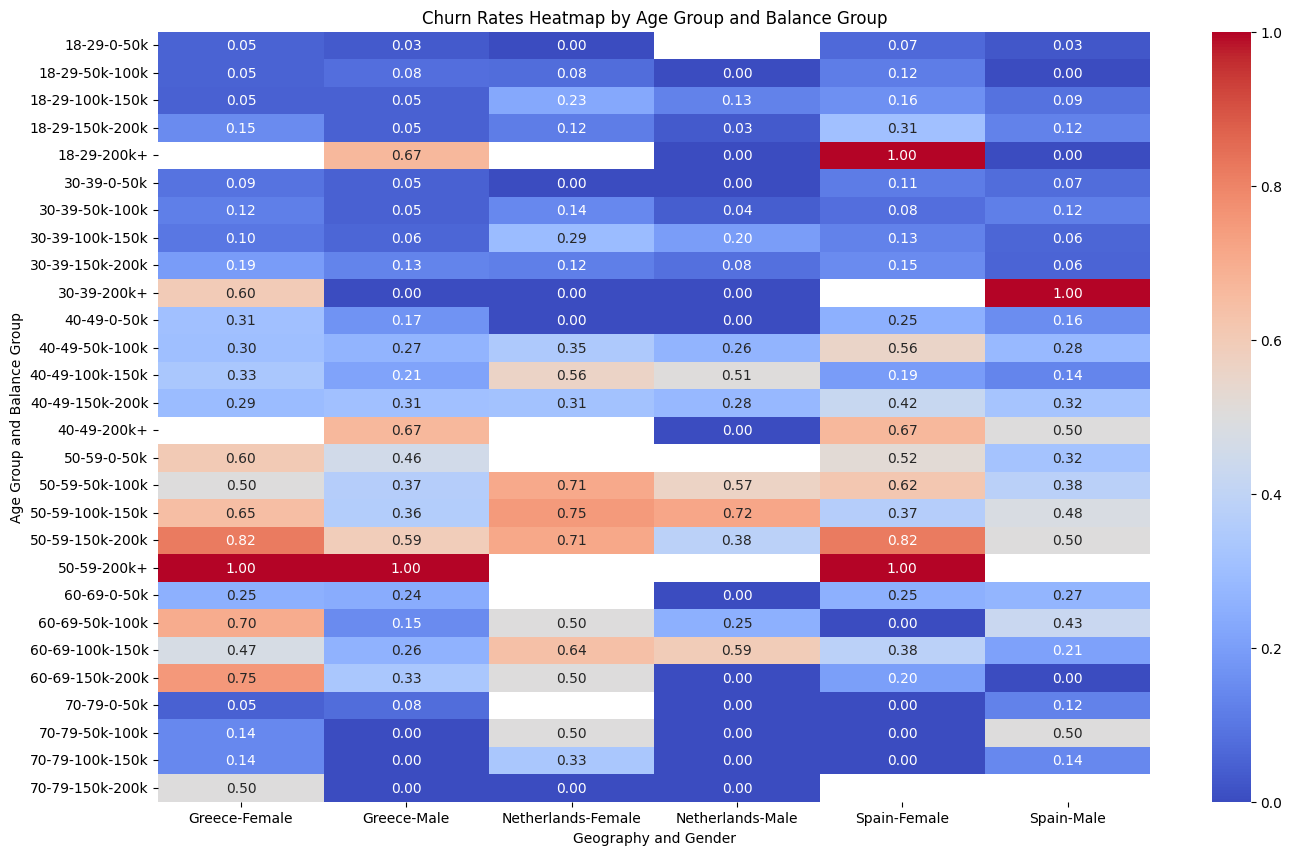

<ipython-input-9-ab084bbac5a0>:49: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_new = churn_rates.pivot_table(index=["Balance Group", "Age Group"],


New Heatmap Data:
Geography                  Greece           Netherlands               Spain  \
Gender                     Female      Male      Female      Male    Female   
Balance Group Age Group                                                       
0-50k         18-29      0.052083  0.034335    0.000000       NaN  0.067416   
              30-39      0.093074  0.047297    0.000000  0.000000  0.112903   
              40-49      0.305195  0.168350    0.000000  0.000000  0.251852   
              50-59      0.604651  0.455556         NaN       NaN  0.520833   
              60-69      0.250000  0.240741         NaN  0.000000  0.250000   
              70-79      0.047619  0.076923         NaN  0.000000  0.000000   
50k-100k      18-29      0.054545  0.078431    0.076923  0.000000  0.115385   
              30-39      0.117188  0.047297    0.144444  0.042017  0.081633   
              40-49      0.301587  0.265060    0.345679  0.264706  0.557692   
              50-59      0.500000 

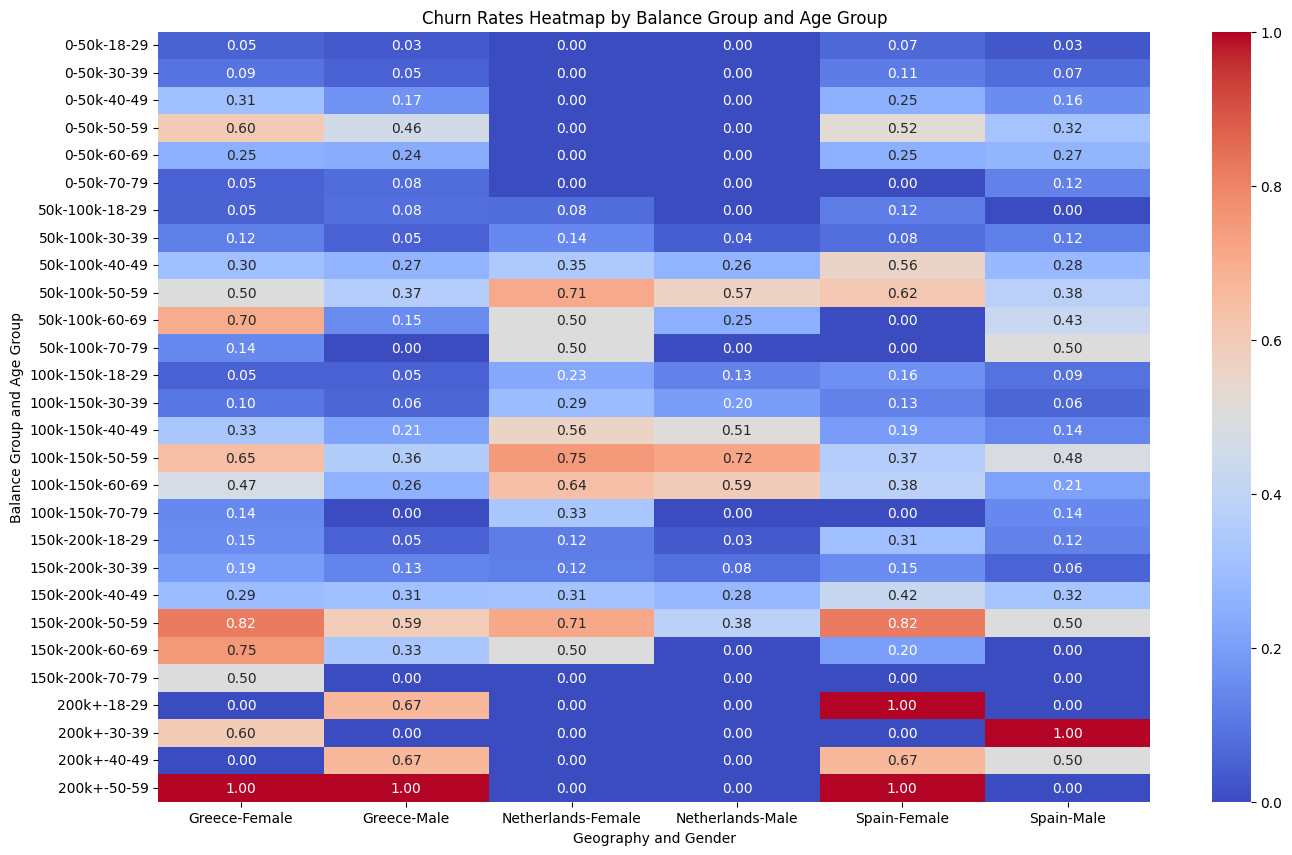

In [ ]:
# further analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your original dataset again
df = pd.read_csv("Summative Data.csv")

# Create a filtered DataFrame with relevant features
df_analysis = df[
    ["Age", "Balance", "Geography", "Gender", "Exited"]
].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 80]  # Age bins
age_labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79"]  # Age labels

# Create a new column for age groups using pd.cut()
df_analysis["Age_Group"] = pd.cut(
    df_analysis["Age"], bins=age_bins, labels=age_labels, right=False
)

# Define balance bins and labels
balance_bins = [
    -1,
    0,
    50000,
    100000,
    150000,
    200000,
    float("inf"),
]  # Define balance ranges
balance_labels = [
    "<0",
    "0-50k",
    "50k-100k",
    "100k-150k",
    "150k-200k",
    "200k+",
]  # Balance labels

# Create a new column for balance groups using pd.cut()
df_analysis["Balance_Group"] = pd.cut(
    df_analysis["Balance"], bins=balance_bins, labels=balance_labels, right=False
)

# Calculate the average churn rates by Geography, Gender, Age Group, and Balance Group
churn_rates = (
    df_analysis.groupby(["Geography", "Gender", "Age_Group", "Balance_Group"])["Exited"]
    .mean()
    .reset_index()
)
churn_rates.columns = [
    "Geography",
    "Gender",
    "Age Group",
    "Balance Group",
    "Churn Rate",
]

# --- Original Heatmap (by Age Group and Balance Group) ---
plt.figure(figsize=(16, 10))
heatmap_data_original = churn_rates.pivot_table(
    index=["Age Group", "Balance Group"],
    columns=["Geography", "Gender"],
    values="Churn Rate",
    aggfunc="mean",
)  # Multi-level pivot table

# Draw the original heatmap
sns.heatmap(heatmap_data_original, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Churn Rates Heatmap by Age Group and Balance Group")
plt.xlabel("Geography and Gender")
plt.ylabel("Age Group and Balance Group")
plt.show()

# --- New Heatmap (by Balance Group and Age Group) ---
plt.figure(figsize=(16, 10))

# Create a pivot table where the Balance Group is organized in ascending order
heatmap_data_new = churn_rates.pivot_table(
    index=["Balance Group", "Age Group"],
    columns=["Geography", "Gender"],
    values="Churn Rate",
    aggfunc="mean",
)  # Multi-level pivot table

# Print the new heatmap data to check for validity
print("New Heatmap Data:")
print(heatmap_data_new)

# Handle NaN values in the heatmap data
# Option 1: Fill NaN values with 0
heatmap_data_new_filled = heatmap_data_new.fillna(0)

# Option 2: Drop NaN values (if preferred)
# heatmap_data_new_dropped = heatmap_data_new.dropna(how='all')  # Drops rows where all values are NaN
# heatmap_data_new_dropped = heatmap_data_new.dropna(how='all', axis=1)  # Drops columns where all values are NaN

# Check the filled data
print("Heatmap Data After Filling NaN:")
print(heatmap_data_new_filled)

# Draw the new heatmap
sns.heatmap(
    heatmap_data_new_filled, annot=True, cmap="coolwarm", fmt=".2f"
)  # Use filled or dropped data
plt.title("Churn Rates Heatmap by Balance Group and Age Group")
plt.xlabel("Geography and Gender")
plt.ylabel("Balance Group and Age Group")
plt.show()

<ipython-input-12-5085f4172e3f>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['KMeans_Cluster'] = kmeans_clusters
<ipython-input-12-5085f4172e3f>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churners['Age_capped_raw'] = df_churners['Age_capped'] * (age_max - age_min) + age_min
<ipython-input-12-5085f4172e3f>:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

Overall Churn Rate: 0.20
Churn Rate for Cluster 1: 0.38
Churn Rate for Cluster 4: 0.27
Mean age of churners in Cluster 1: 44.44 years
Mean age of churners in Cluster 4: 44.87 years
Mean balance of churners in Cluster 1 (pre-normalized): 119780.19
Mean balance of churners in Cluster 4 (pre-normalized): 121394.88


<ipython-input-12-5085f4172e3f>:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_churners, x='KMeans_Cluster', y='Age_capped', showmeans=True, palette="Set1")


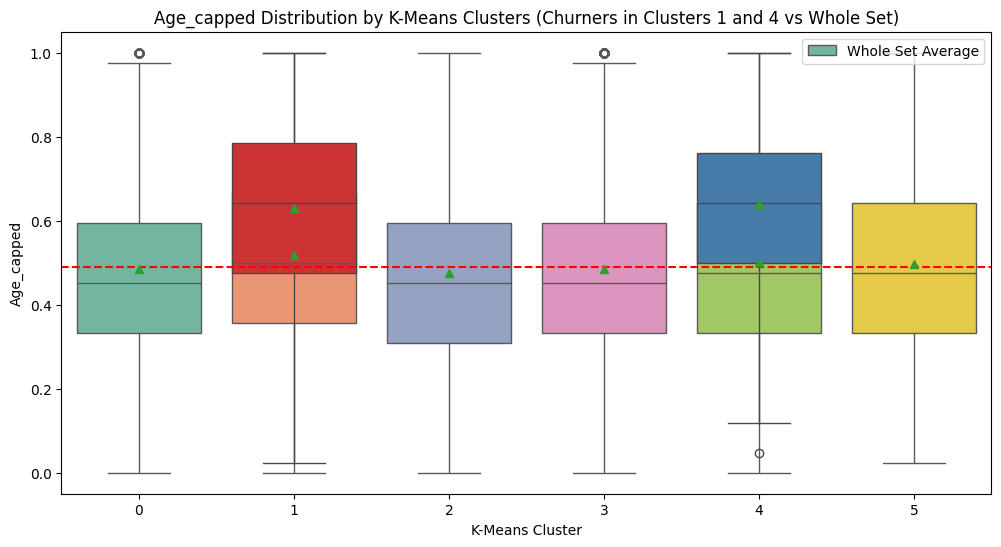

<ipython-input-12-5085f4172e3f>:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='KMeans_Cluster', y='Balance', showmeans=True, palette="Set2")
<ipython-input-12-5085f4172e3f>:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_churners, x='KMeans_Cluster', y='Balance', showmeans=True, palette="Set1")


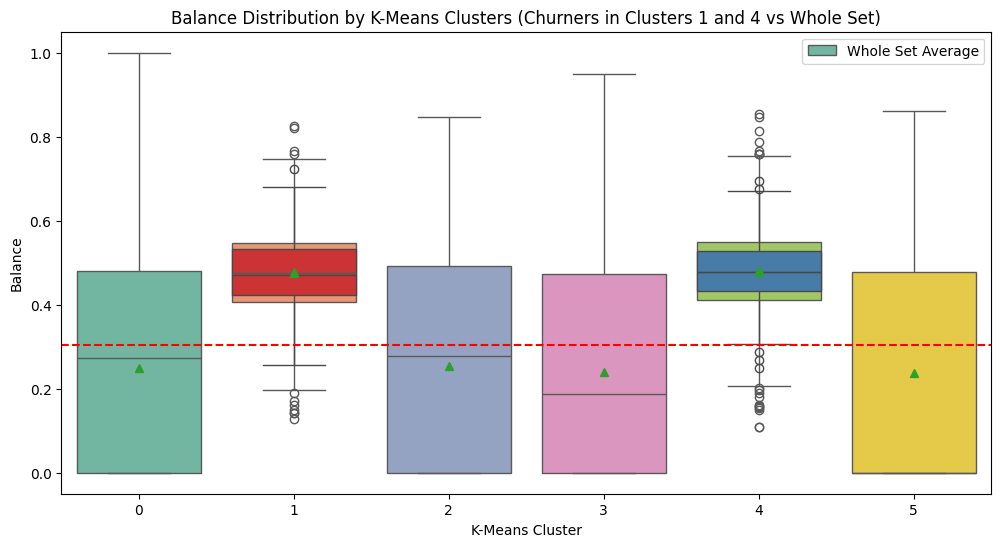

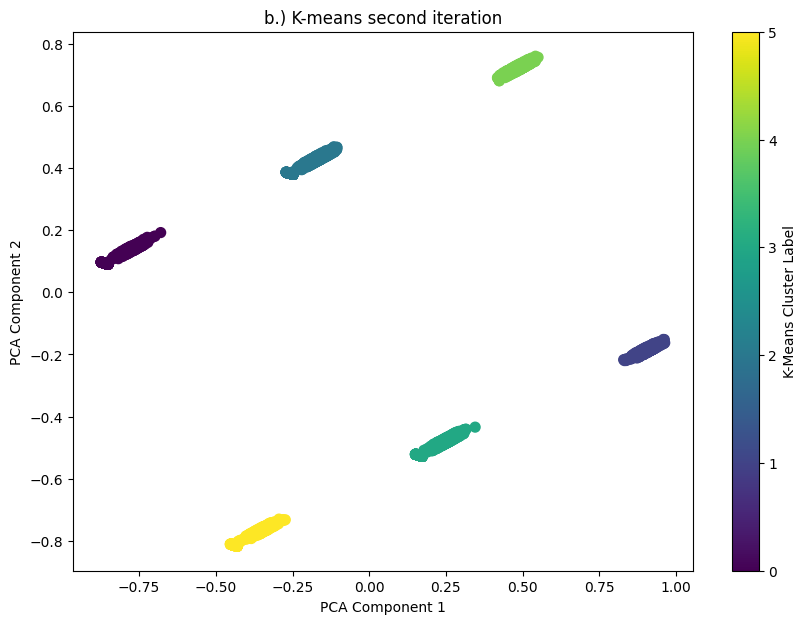

Number of Rows in Each K-Means Cluster:
   Cluster  Number of Rows
0        2            2641
1        3            2157
2        0            1333
3        4            1247
4        1            1149
5        5            1060
Churn Rates by K-Means Cluster:
   Cluster  Churn Rate
0        0    0.132033
1        1    0.375979
2        2    0.128739
3        3    0.202133
4        4    0.274258
5        5    0.214151
Feature Summary by K-Means Cluster with Original Values for Age_capped, Balance, and Total_income:
   KMeans_Cluster  Age_capped   Balance  Total_income  Geography_Netherlands  \
0               0    0.485711  0.250030      0.096623                    0.0   
1               1    0.518173  0.475352      0.094094                    1.0   
2               2    0.474955  0.253513      0.097346                    0.0   
3               3    0.485496  0.239329      0.094576                    0.0   
4               4    0.501967  0.479061      0.093361                    1.0   

In [ ]:
# Clustering v3

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the scaler

# Load dataset into pandas dataframe
df = pd.read_csv("Summative Data.csv")

### Cap Age at the 95th percentile ###
age_95th_percentile = df["Age"].quantile(0.95)  # Calculate the 95th percentile of Age
df["Age_capped"] = np.where(
    df["Age"] > age_95th_percentile, age_95th_percentile, df["Age"]
)  # Cap Age

# Remove the original 'Age' column
df = df.drop(columns=["Age"])

# Select only the key features: Replace 'Age' with 'Age_capped'
df_selected = df[
    ["Age_capped", "Balance", "Total_income", "Geography", "Gender", "Exited"]
]

# One-hot encode the categorical variables (Geography and Gender)
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Normalize the continuous variables (Age_capped, Balance, and Total_income)
normalize_columns = ["Age_capped", "Balance", "Total_income"]
scaler = MinMaxScaler()
df_encoded[normalize_columns] = scaler.fit_transform(df_encoded[normalize_columns])

# Save the scaler for later use
joblib.dump(scaler, "scaler.pkl")

# Remove outliers (rows containing numeric variables with Z-Scores > 3)
numeric_cols = df_encoded.select_dtypes(include=[np.number])
df_filtered = df_encoded[(np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)]

"""
### Elbow Method and Silhouette Analysis for K-Means ###
wcss = []  # Within-cluster sum of squares (WCSS)
silhouette_scores = []  # Silhouette scores

k_values = range(2, 5)  # Trying clusters from 2 to 4

# Loop to compute WCSS and silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_filtered.drop(columns=['Exited']))
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS
    silhouette_avg = silhouette_score(df_filtered.drop(columns=['Exited']), cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS (Elbow method) and Silhouette scores
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot WCSS
ax1.plot(k_values, wcss, marker='o', color='b', label='WCSS')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('WCSS', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

# Create second y-axis for silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and legends
plt.title('Elbow Method and Silhouette Scores')
fig.tight_layout()  # Avoid overlap
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
"""

### Apply K-Means clustering with optimal k ###
optimal_k = 6  # Chose based on elbow method or silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(
    df_filtered.drop(columns=["Exited"])
)  # Exclude 'Exited'

# Add the K-Means cluster labels back to the filtered DataFrame
df_filtered["KMeans_Cluster"] = kmeans_clusters

### Churn Rate Calculations for Clusters 1 and 4 and Whole Set ###
# Calculate overall churn rate
overall_churn_rate = df_filtered["Exited"].mean()

# Calculate churn rate for cluster 1 and cluster 4
cluster_1_churn_rate = df_filtered[df_filtered["KMeans_Cluster"] == 1]["Exited"].mean()
cluster_4_churn_rate = df_filtered[df_filtered["KMeans_Cluster"] == 4]["Exited"].mean()

# Print churn rates
print(f"Overall Churn Rate: {overall_churn_rate:.2f}")
print(f"Churn Rate for Cluster 1: {cluster_1_churn_rate:.2f}")
print(f"Churn Rate for Cluster 4: {cluster_4_churn_rate:.2f}")

### Filter Data for Churners (Exited == 1) in Clusters 1 and 4 ###
df_churners = df_filtered[
    (df_filtered["Exited"] == 1) & df_filtered["KMeans_Cluster"].isin([1, 4])
]

# Reverse normalization for Age_capped to get original age values
scaler = joblib.load("scaler.pkl")

# Extract the min and max values for 'Age_capped' from the original data
age_min = df_selected["Age_capped"].min()
age_max = df_selected["Age_capped"].max()

# Reverse normalization: original_age = normalized_age * (max_age - min_age) + min_age
df_churners["Age_capped_raw"] = (
    df_churners["Age_capped"] * (age_max - age_min) + age_min
)

# Calculate mean ages for churners in clusters 1 and 4
mean_age_cluster_1 = df_churners[df_churners["KMeans_Cluster"] == 1][
    "Age_capped_raw"
].mean()
mean_age_cluster_4 = df_churners[df_churners["KMeans_Cluster"] == 4][
    "Age_capped_raw"
].mean()

# Print mean ages of churners in clusters 1 and 4
print(f"Mean age of churners in Cluster 1: {mean_age_cluster_1:.2f} years")
print(f"Mean age of churners in Cluster 4: {mean_age_cluster_4:.2f} years")

# Calculate mean normalized balance for churners in Cluster 1 and 4
mean_normalized_balance_cluster_1 = df_churners[df_churners["KMeans_Cluster"] == 1][
    "Balance"
].mean()
mean_normalized_balance_cluster_4 = df_churners[df_churners["KMeans_Cluster"] == 4][
    "Balance"
].mean()

# Reverse the normalization for the mean balances
mean_balance_cluster_1 = scaler.inverse_transform(
    [[0, mean_normalized_balance_cluster_1, 0]]
)[0][1]
mean_balance_cluster_4 = scaler.inverse_transform(
    [[0, mean_normalized_balance_cluster_4, 0]]
)[0][1]

# Print the results
print(
    f"Mean balance of churners in Cluster 1 (pre-normalized): {mean_balance_cluster_1:.2f}"
)
print(
    f"Mean balance of churners in Cluster 4 (pre-normalized): {mean_balance_cluster_4:.2f}"
)


### Box plots for Churners in Clusters 1 & 4 vs All Customers ###
# Box plot for Age_capped of churners in Clusters 1 and 4 vs All Customers
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_filtered, x="KMeans_Cluster", y="Age_capped", showmeans=True, palette="Set2"
)
sns.boxplot(
    data=df_churners, x="KMeans_Cluster", y="Age_capped", showmeans=True, palette="Set1"
)
plt.axhline(
    y=df_filtered["Age_capped"].mean(),
    color="r",
    linestyle="--",
    label="Whole Set Average",
)
plt.title(
    "Age_capped Distribution by K-Means Clusters (Churners in Clusters 1 and 4 vs Whole Set)"
)
plt.xlabel("K-Means Cluster")
plt.ylabel("Age_capped")
plt.legend(["Whole Set Average"])
plt.show()

# Box plot for Balance of churners in Clusters 1 and 4 vs All Customers
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_filtered, x="KMeans_Cluster", y="Balance", showmeans=True, palette="Set2"
)
sns.boxplot(
    data=df_churners, x="KMeans_Cluster", y="Balance", showmeans=True, palette="Set1"
)
plt.axhline(
    y=df_filtered["Balance"].mean(),
    color="r",
    linestyle="--",
    label="Whole Set Average",
)
plt.title(
    "Balance Distribution by K-Means Clusters (Churners in Clusters 1 and 4 vs Whole Set)"
)
plt.xlabel("K-Means Cluster")
plt.ylabel("Balance")
plt.legend(["Whole Set Average"])
plt.show()

### PCA for visualization of K-Means clusters ###
pca = PCA(n_components=2)
df_pca_kmeans = pca.fit_transform(
    df_filtered.drop(columns=["KMeans_Cluster", "Exited"])
)

# Create a scatter plot for K-Means clusters
plt.figure(figsize=(10, 7))
plt.scatter(
    df_pca_kmeans[:, 0],
    df_pca_kmeans[:, 1],
    c=df_filtered["KMeans_Cluster"],
    cmap="viridis",
    s=50,
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("b.) K-means second iteration")
plt.colorbar(label="K-Means Cluster Label")
plt.show()

# Display the number of rows in each cluster for K-Means
cluster_counts_kmeans = df_filtered["KMeans_Cluster"].value_counts().reset_index()
cluster_counts_kmeans.columns = ["Cluster", "Number of Rows"]
print("Number of Rows in Each K-Means Cluster:")
print(cluster_counts_kmeans)

### Churn rate for each K-Means cluster ###
exit_rates_kmeans = df_filtered.groupby("KMeans_Cluster")["Exited"].mean().reset_index()
exit_rates_kmeans.columns = ["Cluster", "Churn Rate"]
print("Churn Rates by K-Means Cluster:")
print(exit_rates_kmeans)

# Group the data by K-Means cluster and calculate mean for key features
feature_summary_kmeans = (
    df_filtered.groupby("KMeans_Cluster")[["Age_capped", "Balance", "Total_income"]]
    .mean()
    .reset_index()
)
geography_gender_means = (
    df_filtered.groupby("KMeans_Cluster")[
        df_filtered.columns[df_filtered.columns.str.contains("Geography|Gender")]
    ]
    .mean()
    .reset_index()
)

# Corrected merge
feature_summary_kmeans = pd.merge(
    feature_summary_kmeans, geography_gender_means, on="KMeans_Cluster"
)
print(
    "Feature Summary by K-Means Cluster with Original Values for Age_capped, Balance, and Total_income:"
)
print(feature_summary_kmeans)

           Age   Balance Kids Total_income Years_employed Car  \
0     0.324324       0.0  0.0     0.258721        0.28906   1   
1     0.310811  0.334031  0.0     0.055233        0.07217   0   
2     0.324324  0.636357  0.0     0.156977        0.19417   1   
3     0.283784       0.0  0.0     0.165698            0.0   0   
4     0.337838  0.500246  0.0     0.156977        0.04894   0   
...        ...       ...  ...          ...            ...  ..   
9704  0.054054       0.0  0.0     0.098837       0.012601   0   
9705  0.243243       0.0  0.0     0.055233        0.17145   0   
9706  0.162162       0.0  0.0     0.040698       0.109527   0   
9707  0.310811  0.459038  0.0     0.084302       0.084325   0   
9708  0.054054  0.444576  0.0     0.055233       0.075924   0   

     Education_type_Higher education Education_type_Incomplete higher  \
0                                  1                                1   
1                                  1                                1   


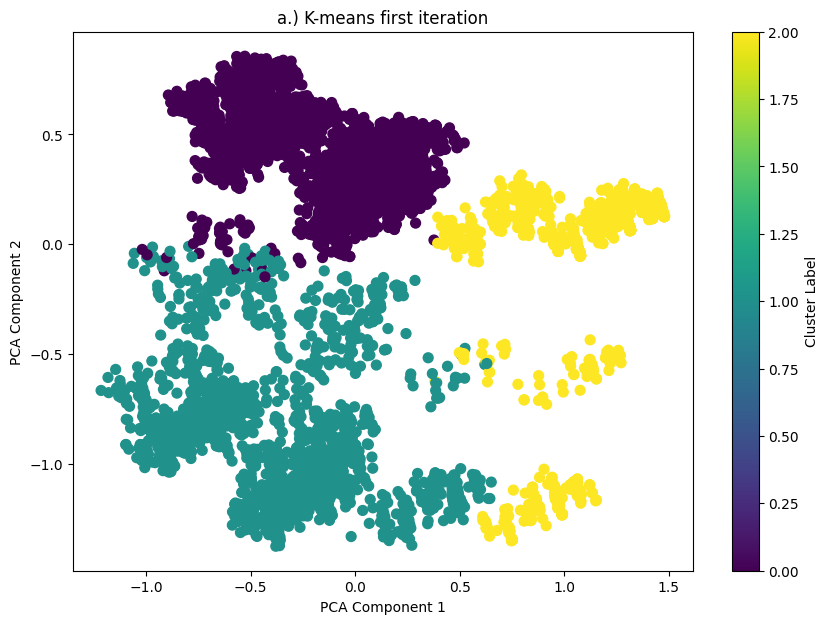

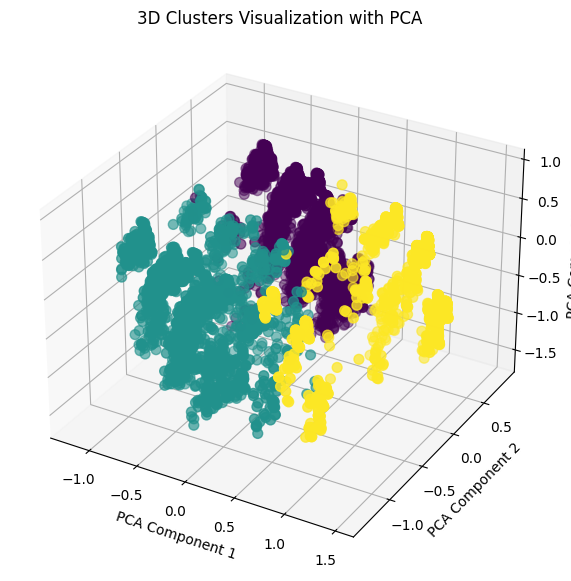

Cluster
0    0.239467
1    0.252648
2    0.265358
Name: Exited, dtype: object


In [ ]:
# k-means original

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load dataset into pandas dataframe
df = pd.read_csv("Summative Data.csv")

# Drop unnecessary column
df = df.drop(
    columns=[
        "ID",
        "Unemployed",
        "Cr_score",
        "Term_deposit",
        "Target",
        "Tenure",
        "Credit_card",
        "Acc_length",
    ]
)

# Normalise continuous variables
normalize_columns = ["Age", "Balance", "Kids", "Total_income", "Years_employed"]

# One-hot encode categorical variables (excluding churn label)
df = pd.get_dummies(df, drop_first=True)

# Define ColumnTransformer object with MinMaxScaler method for normalization
preprocessor = ColumnTransformer(
    transformers=[
        ("normalize", MinMaxScaler(), normalize_columns),
    ],
    remainder="passthrough",  # Keep other columns unchanged (including the one-hot encoded columns)
)

# Use ColumnTransformer to create an array including normalised data
df_transformed = preprocessor.fit_transform(df)

# Convert the array back to a DataFrame
df_transformed = pd.DataFrame(
    df_transformed,
    columns=normalize_columns + df.columns.difference(normalize_columns).tolist(),
)

# Remove outliers (rows containing numeric variables with Z-Scores > 3)
numeric_cols = df_transformed.select_dtypes(include=[np.number])
df_filtered = df_transformed[(np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)]

"""# List to hold WCSS and silhouette scores
wcss = []
silhouette_scores = []

# Range of cluster values
k_values = range(2, 5)  # Start from 2 since silhouette score is not defined for k=1

# Loop over the k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_filtered)  # Using df_filtered for clustering
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the current k
    silhouette_avg = silhouette_score(df_filtered, cluster_labels)  # Calculate silhouette score
    silhouette_scores.append(silhouette_avg)  # Store the silhouette score

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot WCSS
ax1.plot(k_values, wcss, marker='o', color='b', label='WCSS')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('WCSS (Within-Cluster Sum of Squares)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

# Create a second y-axis for the silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and legends
plt.title('Elbow Method and Silhouette Scores')
fig.tight_layout()  # To prevent overlap
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()"""

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_filtered)

# Add the cluster labels back to the filtered DataFrame
df_filtered["Cluster"] = clusters

# Show the final DataFrame with cluster labels
print(df_filtered)

# Calculate the variance for each attribute within each cluster
cluster_variances = df_filtered.groupby("Cluster").var()

# Calculate the mean variance for each cluster
mean_variances = cluster_variances.mean(axis=1)

# Display the mean variance for each cluster
print("Mean Variance for Each Cluster:")
print(mean_variances)

# 1. Apply PCA to reduce the dataset to 2 components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(
    df_filtered.drop(columns=["Cluster"])
)  # Drop the 'Cluster' column before PCA

# 2. Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_filtered["Cluster"], cmap="viridis", s=50)

# 3. Add labels and title
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("a.) K-means first iteration")
plt.colorbar(label="Cluster Label")

# Show the plot
plt.show()

# Reduce to 3 components for 3D visualization
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_filtered.drop(columns=["Cluster"]))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot
ax.scatter(
    df_pca_3d[:, 0],
    df_pca_3d[:, 1],
    df_pca_3d[:, 2],
    c=df_filtered["Cluster"],
    cmap="viridis",
    s=50,
)

# Add labels
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.title("3D Clusters Visualization with PCA")

plt.show()

# Group by 'Cluster' and calculate the mean of 'Exited' for each cluster
prevalence = df_filtered.groupby("Cluster")["Exited"].mean()

# Display the prevalence
print(prevalence)

Age-Balance Interaction Terms in Raw Terms:
  Age_Category Balance_Category  Age_Balance_Interaction  \
0          Old             Zero                        0   
1          Old              Low                        1   
2          Old             High                        2   
3        Young             Zero                        0   
4          Old             High                        2   

  Age_Balance_Interaction_Term  
0             Old-Zero Balance  
1              Old-Low Balance  
2             Old-High Balance  
3           Young-Zero Balance  
4             Old-High Balance  
Number of Rows in Each Hierarchical Cluster:
   Cluster  Number of Rows
0        3            3651
1        0            2073
2        2            1921
3        4             887
4        1             653
5        5             524
Overall Churn Rate: 0.20
Churn Rates by Hierarchical Cluster:
   Cluster  Churn Rate
0        0    0.160637
1        1    0.370597
2        2    0.421655
3        

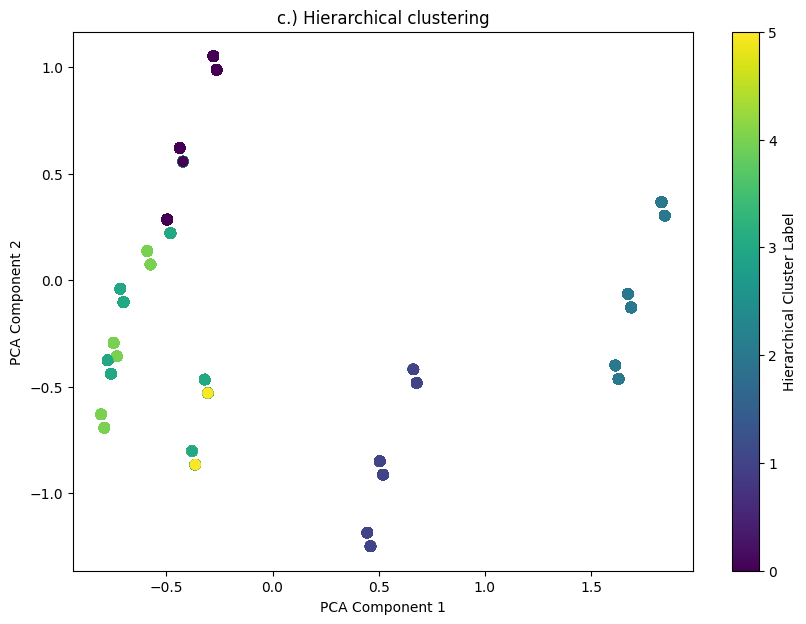

"\nplt.figure(figsize=(12, 8))\ndendrogram = sch.dendrogram(sch.linkage(gower_dist, method='complete'))\nplt.title('Dendrogram of Hierarchical Clustering')\nplt.xlabel('Sample Index')\nplt.ylabel('Distance')\nplt.show()\n"

In [ ]:
# Clustering 3

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
import joblib  # For saving the scaler

!pip install gower
import gower
from sklearn.cluster import AgglomerativeClustering

# Load dataset into pandas dataframe
df = pd.read_csv("Summative Data.csv")

### Step 1: Cap Age and Create Age Category ###
age_95th_percentile = df["Age"].quantile(0.95)
df["Age_capped"] = np.where(
    df["Age"] > age_95th_percentile, age_95th_percentile, df["Age"]
)

# Binarize Age: Young (<40) and Old (>=40)
df["Age_Category"] = np.where(df["Age_capped"] < 40, "Young", "Old")

# Drop the original 'Age' column
df = df.drop(columns=["Age"])

### Step 2: Discretize Balance ###
df["Balance_Category"] = pd.cut(
    df["Balance"], bins=[-np.inf, 0, 100000, np.inf], labels=["Zero", "Low", "High"]
)

### Step 3: Create Age-Balance Interaction Term ###
# Encoding categories as integers for interaction term (Young=0, Old=1; Zero=0, Low=1, High=2)
df["Age_Category_Encoded"] = df["Age_Category"].map({"Young": 0, "Old": 1}).astype(int)
df["Balance_Category_Encoded"] = (
    df["Balance_Category"].map({"Zero": 0, "Low": 1, "High": 2}).astype(int)
)

# Create interaction term
df["Age_Balance_Interaction"] = (
    df["Age_Category_Encoded"] * df["Balance_Category_Encoded"]
)

# Drop intermediary encoding columns
df = df.drop(columns=["Age_Category_Encoded", "Balance_Category_Encoded"])

### Print the Age-Balance Interaction in Raw Terms ###
print("Age-Balance Interaction Terms in Raw Terms:")
interaction_mapping = {
    ("Young", "Zero"): "Young-Zero Balance",
    ("Young", "Low"): "Young-Low Balance",
    ("Young", "High"): "Young-High Balance",
    ("Old", "Zero"): "Old-Zero Balance",
    ("Old", "Low"): "Old-Low Balance",
    ("Old", "High"): "Old-High Balance",
}

# Map the interaction term to human-readable strings
df["Age_Balance_Interaction_Term"] = df.apply(
    lambda x: interaction_mapping[(x["Age_Category"], x["Balance_Category"])], axis=1
)
print(
    df[
        [
            "Age_Category",
            "Balance_Category",
            "Age_Balance_Interaction",
            "Age_Balance_Interaction_Term",
        ]
    ].head()
)

### Step 4: Select only key features and One-Hot Encode ###
# Select the relevant features, including Gender
df_selected = df[
    [
        "Age_Category",
        "Balance_Category",
        "Gender",
        "Geography",
        "Exited",
        "Age_Balance_Interaction",
    ]
]

# One-hot encode categorical variables (Gender, Geography, Age_Category, and Balance_Category)
df_encoded = pd.get_dummies(df_selected, drop_first=True)

### Step 5: Remove Outliers ###
numeric_cols = df_encoded.select_dtypes(include=[np.number])
df_filtered = df_encoded[(np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)]

### Step 6: Gower Distance and Hierarchical Clustering ###
# Calculate Gower distance
gower_dist = gower.gower_matrix(df_filtered)

"""# Elbow Method for determining the optimal number of clusters
inertia = []
K = range(1, 10)  # You can adjust the upper range based on your dataset's size

# Fit KMeans using Gower distance for each number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filtered)  # Assuming df_filtered is the DataFrame with selected features
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()"""

# Apply Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=6, metric="precomputed", linkage="complete"
)
hierarchical_clusters = hierarchical_clustering.fit_predict(gower_dist)

# Add the hierarchical cluster labels to the filtered DataFrame
df_filtered["Hierarchical_Cluster"] = hierarchical_clusters

# Display the number of rows in each cluster
cluster_counts_hierarchical = (
    df_filtered["Hierarchical_Cluster"].value_counts().reset_index()
)
cluster_counts_hierarchical.columns = ["Cluster", "Number of Rows"]
print("Number of Rows in Each Hierarchical Cluster:")
print(cluster_counts_hierarchical)

### Churn Rate Calculations ###
# Calculate overall churn rate
overall_churn_rate = df_filtered["Exited"].mean()

# Print overall churn rate
print(f"Overall Churn Rate: {overall_churn_rate:.2f}")

# Calculate churn rates for each cluster
exit_rates_hierarchical = (
    df_filtered.groupby("Hierarchical_Cluster")["Exited"].mean().reset_index()
)
exit_rates_hierarchical.columns = ["Cluster", "Churn Rate"]
print("Churn Rates by Hierarchical Cluster:")
print(exit_rates_hierarchical)

### Prepare a Summary DataFrame for Clusters ###
agg_funcs = {
    "Age_Balance_Interaction": "mean"  # You can include other metrics as needed
}

# Check if Gender columns exist and include them in the aggregation dictionary
if "Gender_Female" in df_filtered.columns:
    agg_funcs["Gender_Female"] = "mean"  # Add Female representation
if "Gender_Male" in df_filtered.columns:
    agg_funcs["Gender_Male"] = "mean"  # Add Male representation

# Check for Geography columns and add them to the aggregation dictionary
for geo_col in ["Geography_Greece", "Geography_Netherlands", "Geography_Spain"]:
    if geo_col in df_filtered.columns:
        agg_funcs[geo_col] = "mean"  # Add Geography representation

# Calculate summary statistics
cluster_summary = (
    df_filtered.groupby("Hierarchical_Cluster").agg(agg_funcs).reset_index()
)

# Print cluster summary
print("Cluster Summary:")
print(cluster_summary)

### Visualization of Clusters with PCA ###
pca = PCA(n_components=2)
df_pca_hierarchical = pca.fit_transform(
    df_filtered.drop(columns=["Hierarchical_Cluster", "Exited"])
)

# Scatter plot for Hierarchical clusters
plt.figure(figsize=(10, 7))
plt.scatter(
    df_pca_hierarchical[:, 0],
    df_pca_hierarchical[:, 1],
    c=df_filtered["Hierarchical_Cluster"],
    cmap="viridis",
    s=50,
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("c.) Hierarchical clustering")
plt.colorbar(label="Hierarchical Cluster Label")
plt.show()

# Uncomment below for Dendrogram visualization if needed
"""
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(gower_dist, method='complete'))
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
"""

In [ ]:
# preprocessing steps removed for concision
df = pd.read_csv("Summative Data.csv")
# binarise 'Age'
df["Age_Category"] = np.where(df["Age_capped"] < 40, "Young", "Old")
df = df.drop(columns=["Age"])
# discretise 'Balance'
df["Balance_Category"] = pd.cut(
    df["Balance"], bins=[-np.inf, 0, 100000, np.inf], labels=["Zero", "Low", "High"]
)
# create balance interaction term
df["Age_Balance_Interaction"] = (
    df["Age_Category_Encoded"] * df["Balance_Category_Encoded"]
)
df = df.drop(columns=["Age_Category_Encoded", "Balance_Category_Encoded"])
# select primary attributes
df_selected = df[
    [
        "Age_Category",
        "Balance_Category",
        "Gender",
        "Geography",
        "Exited",
        "Age_Balance_Interaction",
    ]
]
# compute gower distance matrix
gower_dist = gower.gower_matrix(df_filtered)
# perform clustering
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=6, metric="precomputed", linkage="complete"
)
hierarchical_clusters = hierarchical_clustering.fit_predict(gower_dist)

# Add the hierarchical cluster labels to the filtered DataFrame
df_filtered["Hierarchical_Cluster"] = hierarchical_clusters

# Display the number of rows in each cluster
cluster_counts_hierarchical = (
    df_filtered["Hierarchical_Cluster"].value_counts().reset_index()
)
cluster_counts_hierarchical.columns = ["Cluster", "Number of Rows"]
print("Number of Rows in Each Hierarchical Cluster:")
print(cluster_counts_hierarchical)

### Churn Rate Calculations ###
# Calculate overall churn rate
overall_churn_rate = df_filtered["Exited"].mean()

# Print overall churn rate
print(f"Overall Churn Rate: {overall_churn_rate:.2f}")

# Calculate churn rates for each cluster
exit_rates_hierarchical = (
    df_filtered.groupby("Hierarchical_Cluster")["Exited"].mean().reset_index()
)
exit_rates_hierarchical.columns = ["Cluster", "Churn Rate"]
print("Churn Rates by Hierarchical Cluster:")
print(exit_rates_hierarchical)

### Prepare a Summary DataFrame for Clusters ###
agg_funcs = {
    "Age_Balance_Interaction": "mean"  # You can include other metrics as needed
}

# Check if Gender columns exist and include them in the aggregation dictionary
if "Gender_Female" in df_filtered.columns:
    agg_funcs["Gender_Female"] = "mean"  # Add Female representation
if "Gender_Male" in df_filtered.columns:
    agg_funcs["Gender_Male"] = "mean"  # Add Male representation

# Check for Geography columns and add them to the aggregation dictionary
for geo_col in ["Geography_Greece", "Geography_Netherlands", "Geography_Spain"]:
    if geo_col in df_filtered.columns:
        agg_funcs[geo_col] = "mean"  # Add Geography representation

# Calculate summary statistics
cluster_summary = (
    df_filtered.groupby("Hierarchical_Cluster").agg(agg_funcs).reset_index()
)

# Print cluster summary
print("Cluster Summary:")
print(cluster_summary)

### Visualization of Clusters with PCA ###
pca = PCA(n_components=2)
df_pca_hierarchical = pca.fit_transform(
    df_filtered.drop(columns=["Hierarchical_Cluster", "Exited"])
)

# Scatter plot for Hierarchical clusters
plt.figure(figsize=(10, 7))
plt.scatter(
    df_pca_hierarchical[:, 0],
    df_pca_hierarchical[:, 1],
    c=df_filtered["Hierarchical_Cluster"],
    cmap="viridis",
    s=50,
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("c.) Hierarchical clustering")
plt.colorbar(label="Hierarchical Cluster Label")
plt.show()

# Uncomment below for Dendrogram visualization if needed
"""
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(gower_dist, method='complete'))
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
"""